___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [4]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
X_train[5].shape
# Checking the shape of one image

(28, 28)

In [6]:
#Its 28 rows and 28 columns array

In [7]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [8]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

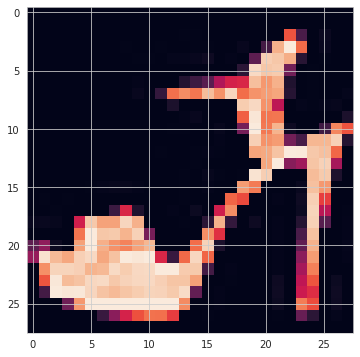

In [9]:
plt.imshow(X_train[9])
# plt.matshow(X_train[9])
#image located on 9 index

In [10]:
classes[int(X_train[9][0][0])]

'T-shirt/top'

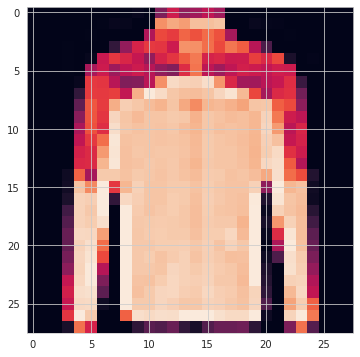

In [11]:
plt.imshow(X_train[1729])
# plt.matshow(X_train[9])
#image located on 9 index

In [12]:
classes[int(X_train[1729][0][0])]

'T-shirt/top'

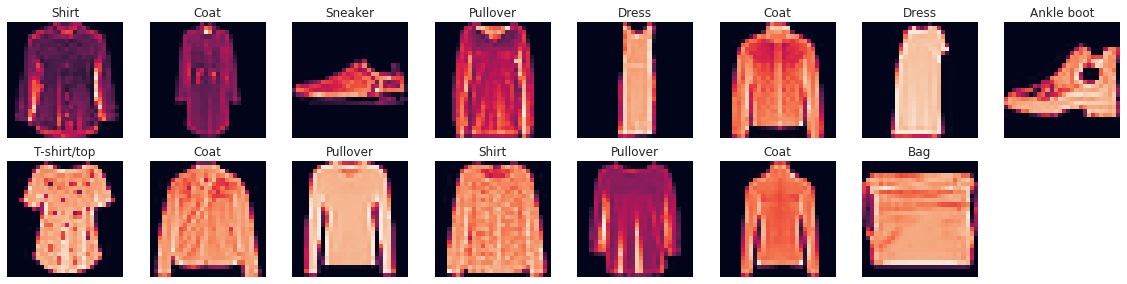

In [13]:
plt.figure(figsize=(20, 20))
for i in range(15):
    rand_index = int(np.random.randint(low=0, high=60000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

In [14]:
#15 random images

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [15]:
X_train[5].min()

0

In [16]:
X_train[5].max()

255

In [17]:
# Normalize image pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [18]:
X_train[5].min()

0.0

In [19]:
X_train[5].max()

1.0

In [20]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [21]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [22]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [23]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [24]:
from tensorflow.keras.utils import to_categorical

In [25]:
#one hot encoding
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [26]:
y_train[9]

5

In [27]:
Y_train[9]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [58]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 
model.add(MaxPool2D(pool_size=(2, 2))) # stride = pool size, padding = valid


model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [83]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 

model.add(MaxPool2D(pool_size=(2, 2))) # stride = pool size, padding = valid

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [84]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               692352    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [85]:
from tensorflow.keras.callbacks import EarlyStopping

In [86]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [87]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3952 - accuracy: 0.8607 - val_loss: 0.3094 - val_accuracy: 0.8890
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2672 - accuracy: 0.9039 - val_loss: 0.2706 - val_accuracy: 0.9012
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2233 - accuracy: 0.9180 - val_loss: 0.3029 - val_accuracy: 0.8878
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1929 - accuracy: 0.9289 - val_loss: 0.2550 - val_accuracy: 0.9061
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1664 - accuracy: 0.9394 - val_loss: 0.2502 - val_accuracy: 0.9109
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1424 - accuracy: 0.9471 - val_loss: 0.2721 - val_accuracy: 0.9069
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1213 - accuracy: 0.9546 - val_loss: 0.2629 - val_accuracy:

In [88]:
model.metrics_names

['loss', 'accuracy']

In [89]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.395,0.861,0.309,0.889
1,0.267,0.904,0.271,0.901
2,0.223,0.918,0.303,0.888
3,0.193,0.929,0.255,0.906
4,0.166,0.939,0.250,0.911


**TASK 7: Plot values of metrics you used in your model.**

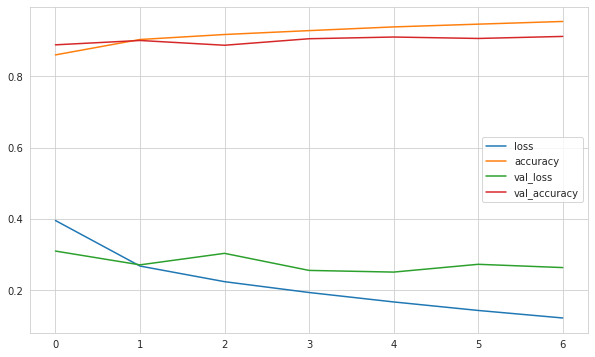

In [90]:
summary.plot();

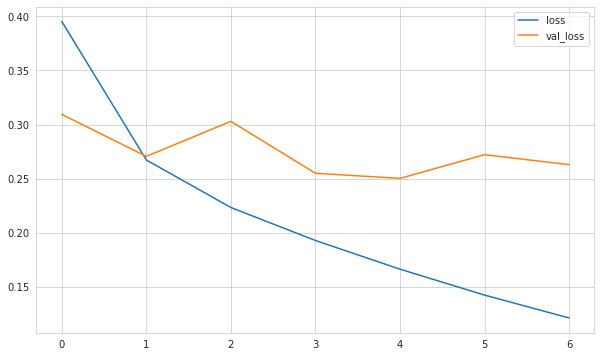

In [91]:
summary[["loss", "val_loss"]].plot();

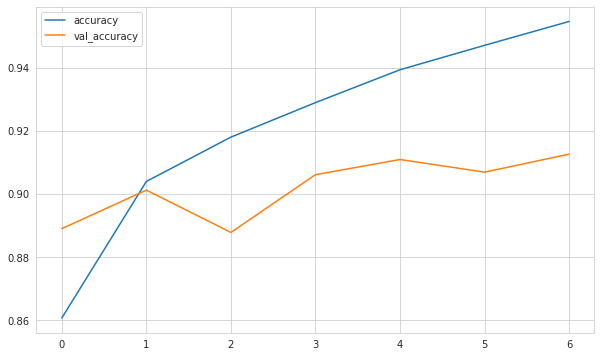

In [93]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [94]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [95]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2502 - accuracy: 0.9109


[0.25024867057800293, 0.9108999967575073]

In [96]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.25024867057800293
Test accuracy: 0.9108999967575073


In [97]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.25024867057800293
Test accuracy: 0.9108999967575073


In [98]:
pred_prob = model.predict(X_test)
pred_prob

array([[1.1956565e-05, 8.4518085e-08, 1.0791046e-05, ..., 3.0026743e-03,
        2.6854110e-05, 9.9560791e-01],
       [1.0267189e-05, 1.7047954e-13, 9.9998915e-01, ..., 6.6580205e-13,
        9.8938019e-12, 2.4965256e-12],
       [6.9629182e-09, 1.0000000e+00, 2.8442808e-09, ..., 1.1697910e-13,
        4.0464063e-11, 3.4605016e-14],
       ...,
       [6.4213532e-06, 1.7911810e-12, 4.5924722e-07, ..., 2.6821908e-07,
        9.9996889e-01, 6.1413613e-10],
       [1.1430258e-06, 9.9999595e-01, 5.4935285e-08, ..., 6.0506003e-11,
        2.4149269e-09, 1.2545423e-10],
       [1.0030579e-03, 2.6397895e-06, 8.6485287e-03, ..., 1.6782334e-01,
        8.8443561e-03, 7.6226576e-04]], dtype=float32)

In [99]:
pred_prob.shape

(10000, 10)

In [100]:
pred_prob[0]

array([1.1956565e-05, 8.4518085e-08, 1.0791046e-05, 1.7108046e-06,
       8.9724072e-06, 1.3255706e-03, 3.5467529e-06, 3.0026743e-03,
       2.6854110e-05, 9.9560791e-01], dtype=float32)

In [101]:
np.argmax(pred_prob[0])

9

In [102]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [103]:
y_pred.shape

(10000,)

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1000
           1       1.00      0.97      0.99      1000
           2       0.87      0.85      0.86      1000
           3       0.93      0.90      0.91      1000
           4       0.81      0.92      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.80      0.68      0.73      1000
           7       0.92      0.99      0.95      1000
           8       0.98      0.99      0.98      1000
           9       0.99      0.92      0.95      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [105]:
print(confusion_matrix(y_test, y_pred))

[[911   0  14  10   1   1  54   1   8   0]
 [  2 975   0  15   3   0   3   0   2   0]
 [ 18   1 852   5  69   0  54   0   1   0]
 [ 18   2  10 895  46   0  27   0   2   0]
 [  1   1  41  11 919   0  26   0   1   0]
 [  0   0   0   0   0 978   0  15   0   7]
 [134   0  57  25  98   0 677   0   9   0]
 [  0   0   0   0   0   6   0 989   0   5]
 [  1   0   0   2   2   2   1   2 990   0]
 [  0   0   0   0   0   7   1  69   0 923]]


In [109]:
classes[0]

'T-shirt/top'

In [110]:
classes[7]

'Sneaker'

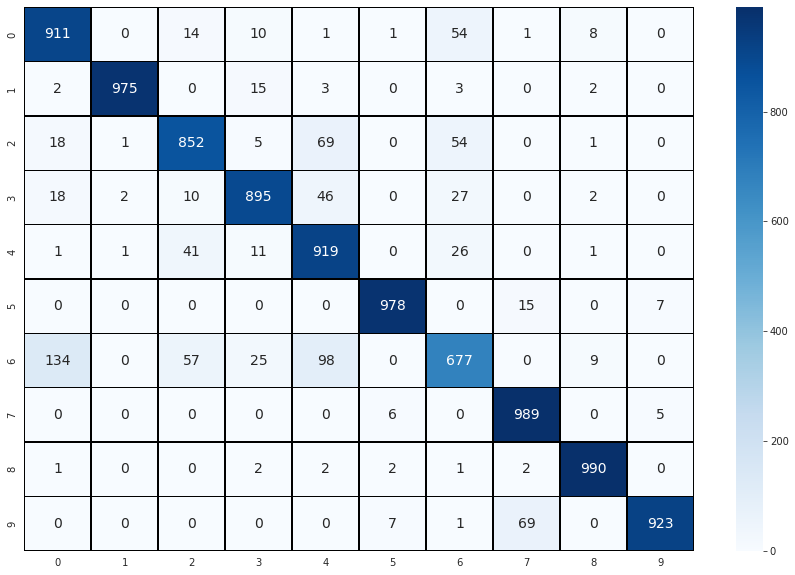

In [106]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

In [107]:
y_test != y_pred

array([False, False, False, ..., False, False, False])

In [108]:
(y_test != y_pred).sum()

891

## Prediction

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___